# Dataset visualization

### Nececary imports

In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data
import numpy as np
import pandas as pd
import pylab
from matplotlib import pyplot as plt

### Reading the data

In [2]:
df = load_dataset(split=False)

In [3]:
df.shape

(20653, 25)

### Attributes

In [4]:
df.keys()

Index(['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'category', 'A', 'A#', 'B', 'C', 'C#',
       'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype='object')

### Overview

In [5]:
df.head()

danceability  energy  loudness  mode  speechiness  acousticness  \
0         0.901   0.522    -8.304     1       0.3300       0.01140   
1         0.834   0.730    -3.714     1       0.2220       0.00513   
3         0.876   0.786    -4.884     0       0.3060       0.06270   
4         0.900   0.653    -6.962     0       0.2890       0.09450   
5         0.738   0.629    -4.882     0       0.0495       0.26800   

   instrumentalness  liveness  valence    tempo ...  B  C C#  D  D#  E  F  F#  \
0           0.00000     0.259    0.329  104.053 ...  0  0  0  1   0  0  0   0   
1           0.00000     0.124    0.446  155.008 ...  0  0  0  0   0  0  0   0   
3           0.00000     0.127    0.575  153.068 ...  0  0  0  0   0  0  0   0   
4           0.00000     0.528    0.399  112.503 ...  0  0  1  0   0  0  0   0   
5           0.00114     0.163    0.319  146.067 ...  0  0  0  0   0  0  0   1   

   G  G#  
0  0   0  
1  0   1  
3  0   0  
4  0   0  
5  0   0  

[5 rows x 25 columns]

### Attribute value distributions

In [6]:
s = ''
for category in df.category.unique():
    s += "%25s | %5d\n" % (category, int(df[df.category == category].shape[0]))
print(s)

                   hiphop |   917
                    chill |  6446
                classical |  6446
                    party |   527
                  workout |   600
                      pop |   105
                     rock |   887
                    metal |   750
                    latin |   556
                  country |   771
                indie_alt |   768
                     punk |   704
                     jazz |   688
                      rnb |   488



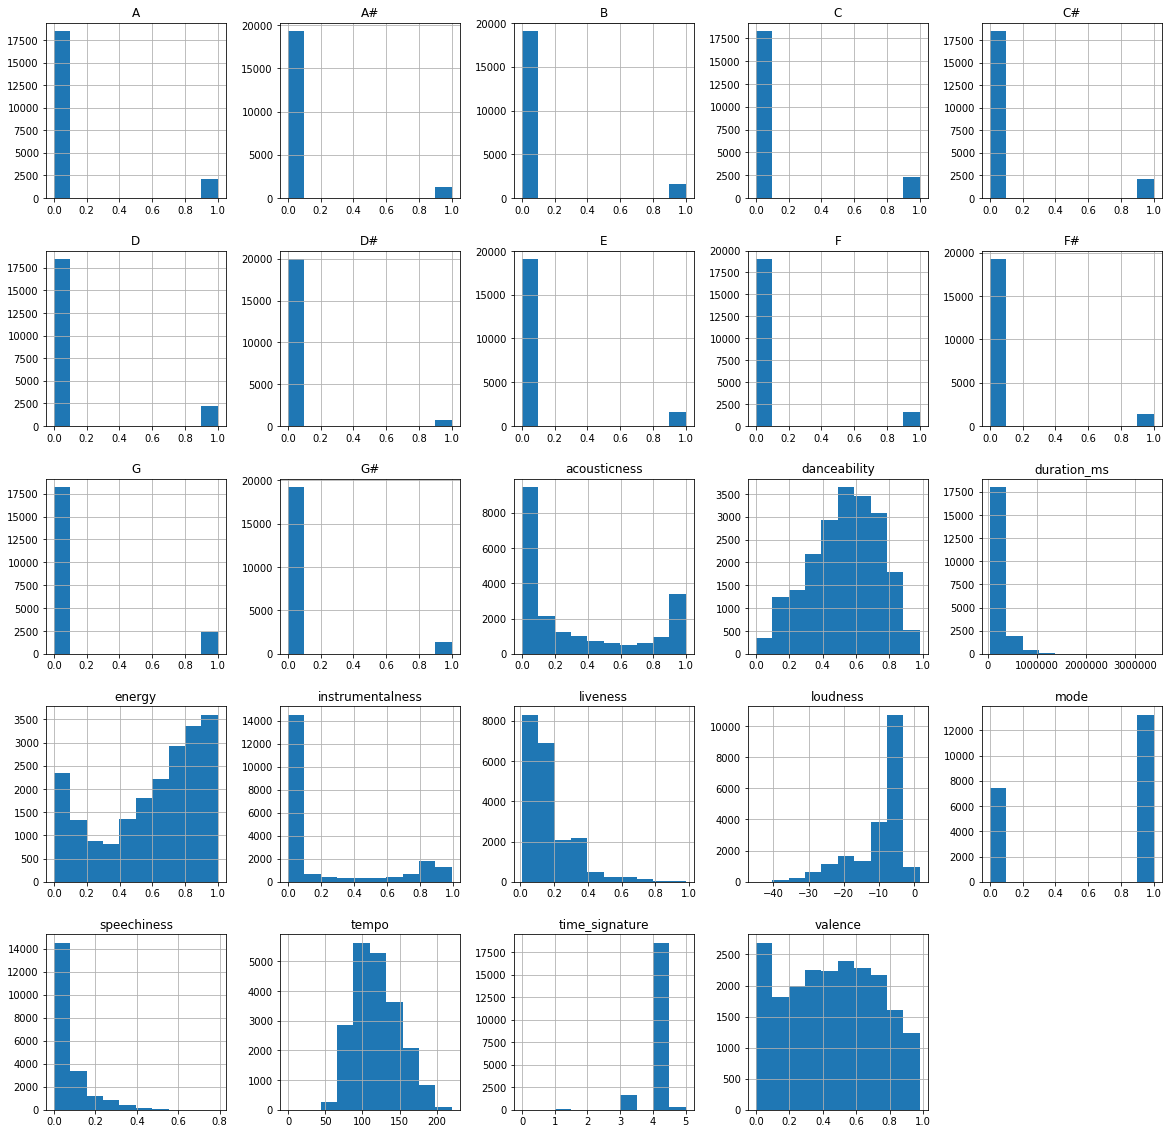

In [7]:
pd.DataFrame.hist(df, figsize=[20,20]);

In [10]:
maxv = df.max(axis=0)
maxv = maxv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])
minv = df.min(axis=0)
minv = minv.drop(labels=['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', \
                         'mode', 'time_signature', 'G', 'G#'])

s = ''
for k in maxv.keys():
    s += "%25s | min: %15.5f | max: %15.5f | mean: %15.5f\n" % (k, float(minv[k]), float(maxv[k]), np.mean(df[k]))
print(s)

             danceability | min:         0.00000 | max:         0.98100 | mean:         0.53422
                   energy | min:         0.00021 | max:         0.99900 | mean:         0.59631
                 loudness | min:       -44.92000 | max:         1.58500 | mean:        -9.91081
              speechiness | min:         0.00000 | max:         0.79100 | mean:         0.08617
             acousticness | min:         0.00000 | max:         0.99600 | mean:         0.32331
         instrumentalness | min:         0.00000 | max:         0.99300 | mean:         0.20240
                 liveness | min:         0.01090 | max:         0.97900 | mean:         0.17559
                  valence | min:         0.00000 | max:         0.97900 | mean:         0.45692
                    tempo | min:         0.00000 | max:       220.01800 | mean:       119.55510
              duration_ms | min:     41667.00000 | max:   3383971.00000 | mean:    273678.61739



### Null values

In [ ]:
number_of_columns = df.shape[1]
plt.xticks(range(0, number_of_columns), df.columns, rotation='vertical')
plt.imshow(df.isnull(), cmap='viridis', aspect='auto')

### Data relations

In [ ]:
colors = [int(i % 23) for i in df['category']]

#### Energy vs. Loudness

In [ ]:
plt.xlabel('loudness')
plt.ylabel('energy')
pylab.scatter(df['loudness'], df['energy'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Loudness vs. tempo

In [ ]:
plt.xlabel('loudness')
plt.ylabel('tempo')
pylab.scatter(df['loudness'], df['tempo'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Popularity vs. valence

In [ ]:
plt.xlabel('acousticness')
plt.ylabel('liveness')
pylab.scatter(df['acousticness'], df['liveness'], c=colors, cmap=pylab.cm.cool)
pylab.show()

#### Danceability vs. valence

In [ ]:
plt.xlabel('danceability')
plt.ylabel('valence')
pylab.scatter(df['danceability'], df['valence'], c=colors, cmap=pylab.cm.cool)
pylab.show()

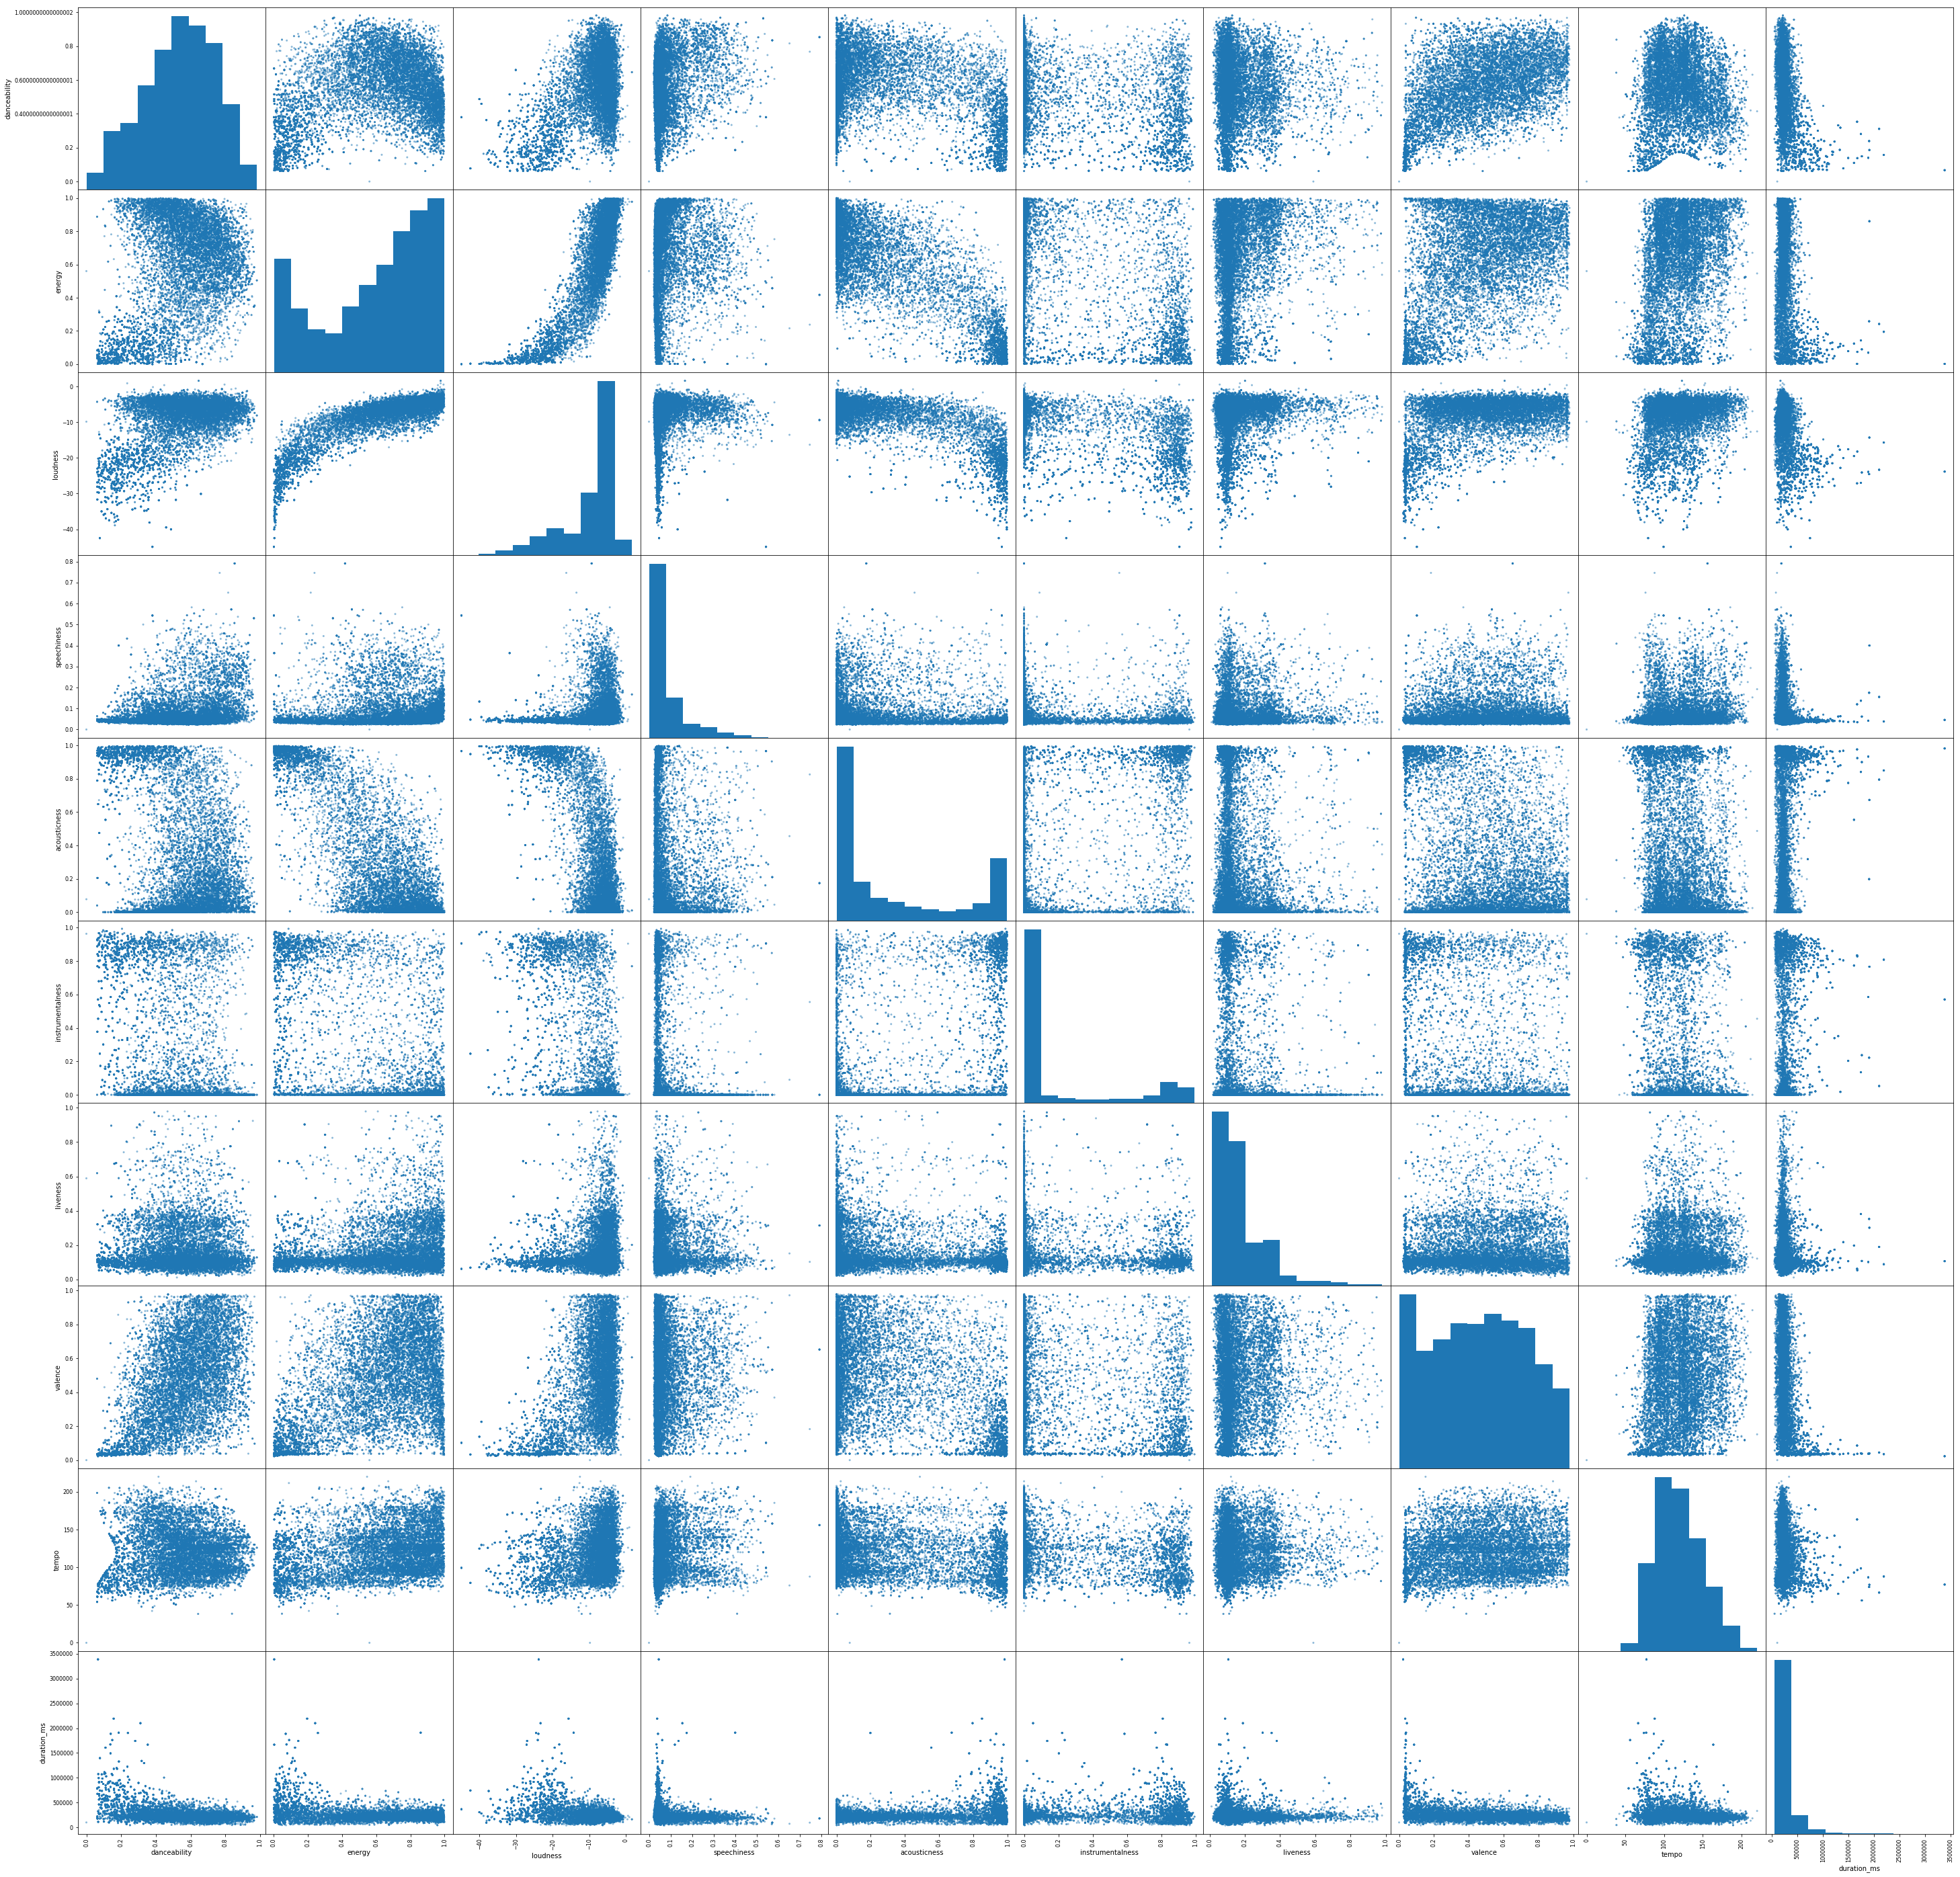

In [26]:
sm = pd.plotting.scatter_matrix(df.drop(['category', 'A', 'A#', 'B', 'C', 'C#', 'D', 'D#', \
                                         'E', 'F', 'F#', 'mode', 'time_signature', 'G', 'G#'], \
                                        axis=1), figsize=[50,50], range_padding=0.1);
